## Árboles de decisión: Clasificación

Lo primero es importarnos nuestras librerías y luego puntualizar que aunque en las sesiones prácticas, por una cuestión de tiempos, no vamos a hacer todo el proceso de modelado, no olvides que sí que tendrás que hacerlo cuando te enfrentes a ellos en prácticas y en tu vida profesional. Aquí está preparado para ir al lío directamente. Por eso no perdamos tiempo.

In [1]:
import numpy as np
import pandas as pd
import sklearn

# para que la salida de este notebook sea estable en todas las ejecuciones
np.random.seed(42)

# Pintar!
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


### Entrenar y visualizar

Para nuestro ejemplo vamos a emplear un dataset que ya conoces el "Iris dataset", sí el de las flores con el que has trabajado en varios ejercicios ya. Lo cargamos y ya además construimos el modelo sobre él, ya que el Iris Dataset viene limpito y preparado.

Además, un detalle importante de los Arboles: NO NECESITAN ESCALADO, NI PREPARACION  (si puede que necesiten limpieza y conversión de categórica a numérica)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target


In [3]:
df_X = pd.DataFrame(iris.data[:,2:], columns = iris.feature_names[2:])
df_X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2,
                                  random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Observa que hemos introducido ya un "hiperparámetro" (veremos los más importantes al finalizar las sesiones de modelado programático y los repasaremos en el siguiente bloque de sesiones de esta unidad): 
* **max_depth**: La máxima profundidad del árbol en niveles. Si es None, los nodos se expanden hasta que todas las hojas son puras o hasta que todas las hojas contienen menos muestras que `min_samples_split`.
* **min_samples_split**: El número mínimo de muestras necesarias para dividir un nodo interno. Es decir que no creará un nodo si al hacerlo este no contiene ese mínimo número de muestras.


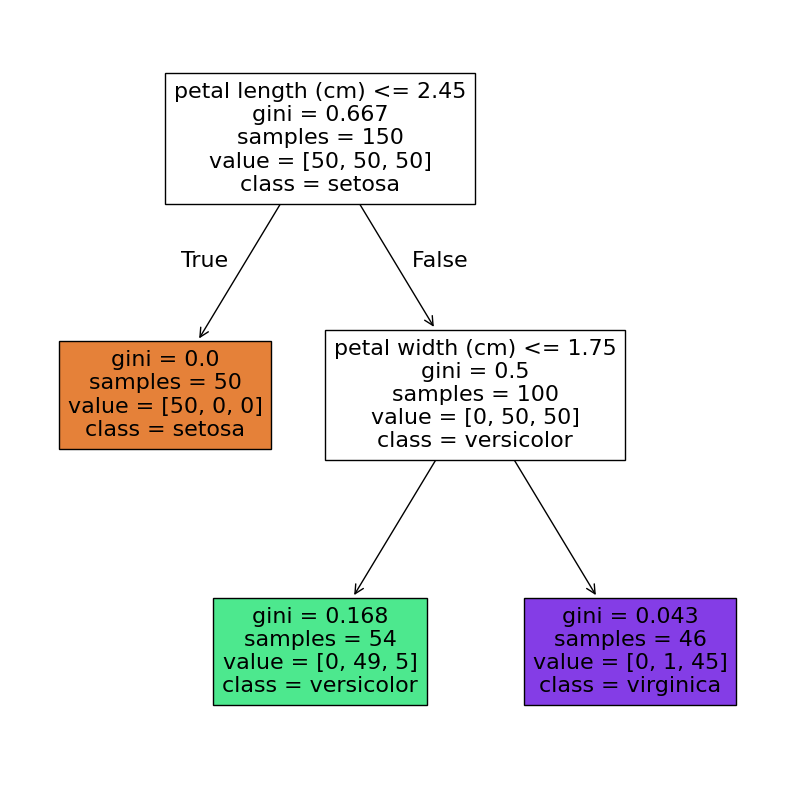

In [5]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               filled = True); # Prueba a poner el argumento 'filled' a False

Veamos las fronteras que crean esos "splits" de los árboles (no hace falta que "memorices" el código siguiente, pero siempre puedes "quedártelo"):

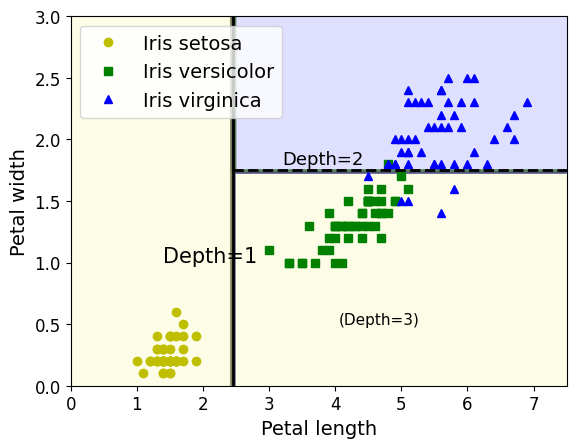

In [6]:
from matplotlib.colors import ListedColormap


clf = tree_clf
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['#fafab0','#9898ff'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
plt.axis(axes)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=1", fontsize=15)
plt.text(3.2, 1.80, "Depth=2", fontsize=13)
plt.text(4.05, 0.5, "(Depth=3)", fontsize=11)
plt.show();

En este caso es fácil ver los limites porque sólo tenemos dos features, pero no esperes que puedas pintar estos límites en futuros modelos con árboles, como mucho el árbol de decisión (Que de alguna forma ya está bien porque permite explicar el modelo muy bien).

***

### Predecir las clases y la probabilidad de las clases

Lo positivo de usar un framework es que se mantienen los métodos de los objetos para poder hacer las cosas. En este sentido, el clasificador sobre árboles binarios también permite predicciones y obtener probabilidades de una forma similar a como lo hacíamos con la regresión logística aplicada a clasificación:

In [7]:
tree_clf.predict_proba([[4, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[4, 1.5]])

array([1])

Como puedes ver hasta ahora no hay mucha diferencia (mientras no entremos de lleno en los hiperparámetros) entre la forma en la que se llaman y entrenan los diferentes tipos de modelos que hemos visto. Pero si hay algo importante a tener en cuenta con los árboles.

### High Variance: Sensibilidad a la hora de entrenar el conjunto de datos

El principal problema de los árboles de decisión es que son muy sensibles a pequeñas variaciones en los datos de entrenamiento. Por ejemplo, si sólo se limina el Iris versicolor más ancho del conjunto de entrenamiento del iris (el que tiene pétalos de 4,8 cm de largo y 1,8 cm de ancho) y se entrena un nuevo Árbol de decisión podemos obtener un modelo completamente diferente. Es decir, sí se ajusta muy bien a los datos a.k.a Overfitting y peor generalización. 

Veámoslo:

In [9]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # la flor Iris versicolor más ancha

array([[4.8, 1.8]])

In [10]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

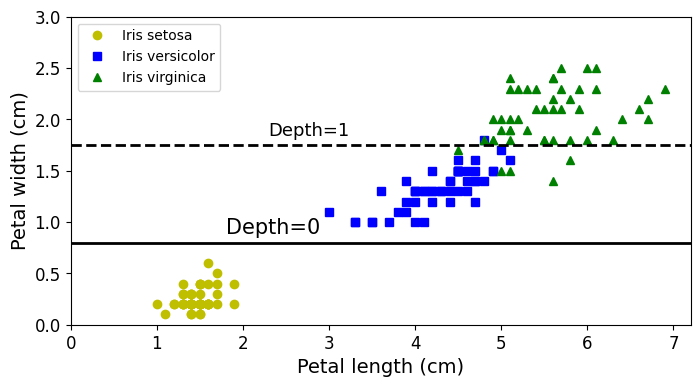

In [11]:
plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X)
#plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()

### Resto de fases

En los ejercicios las contemplaremos. 
